In [2]:
x_values = [i for i in range(11)]

In [3]:
print(x_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [6]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

(11,)

In [7]:
y_values = [2*i + 1 for i in x_values]

In [8]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

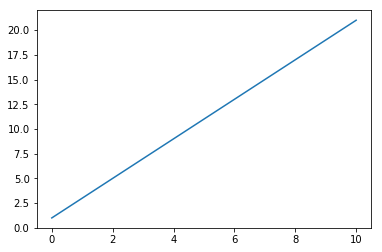

In [9]:
plt.plot(x_values, y_values)
plt.show()

In [10]:
y_train = np.array(y_values, dtype=np.float32)

In [27]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [53]:
import torch.nn as nn
from torch.autograd import Variable as Variable

In [13]:
# create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out


In [14]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

In [21]:
criterion = nn.MSELoss()

In [20]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [30]:
model.parameters()
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [31]:
epochs = 100

In [54]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients wrt parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # getting gradients wrt parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    st = loss.data[0]
    print(f'epoch {epoch}, loss {st}')

epoch 1, loss 0.020232712849974632
epoch 2, loss 0.02000678889453411
epoch 3, loss 0.01978338323533535
epoch 4, loss 0.019562406465411186
epoch 5, loss 0.019343944266438484
epoch 6, loss 0.01912795752286911
epoch 7, loss 0.018914423882961273
epoch 8, loss 0.018703175708651543
epoch 9, loss 0.018494322896003723
epoch 10, loss 0.01828780025243759
epoch 11, loss 0.018083520233631134
epoch 12, loss 0.017881646752357483
epoch 13, loss 0.017681939527392387
epoch 14, loss 0.017484456300735474
epoch 15, loss 0.01728922687470913
epoch 16, loss 0.017096249386668205
epoch 17, loss 0.016905300319194794
epoch 18, loss 0.016716526821255684
epoch 19, loss 0.0165298730134964
epoch 20, loss 0.016345294192433357
epoch 21, loss 0.016162728890776634
epoch 22, loss 0.015982260927557945
epoch 23, loss 0.015803784132003784
epoch 24, loss 0.015627257525920868
epoch 25, loss 0.015452802181243896
epoch 26, loss 0.01528016384691
epoch 27, loss 0.015109567902982235
epoch 28, loss 0.01494082435965538
epoch 29, los

In [55]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.84823316],
       [ 2.870089  ],
       [ 4.891945  ],
       [ 6.9138007 ],
       [ 8.935657  ],
       [10.957513  ],
       [12.979368  ],
       [15.001224  ],
       [17.023079  ],
       [19.044935  ],
       [21.066792  ]], dtype=float32)

In [56]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [58]:
avg_error = np.mean(abs(y_train - predicted))
avg_error

0.067220345

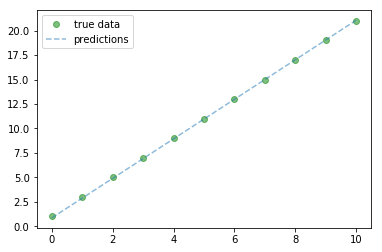

In [60]:
plt.clf()

plt.plot(x_train, y_train, 'go', label='true data', alpha=0.5)
plt.plot(x_train, predicted, '--',label='predictions',alpha=0.5)
plt.legend(loc='best')
plt.show()

In [61]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [62]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))